# Examples for rank 4 array

Pass COO-like data to `SPZ` with one array of indices for each dimension.

The default is to create CSF sparse data structure where all but the last dimension are doubly compressed.

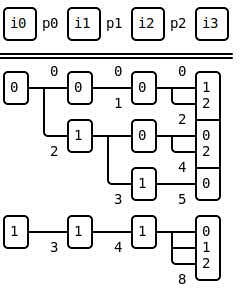

In [1]:
from spz import SPZ
import itertools
import IPython

indices = [
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 2, 0, 2, 0, 0, 1, 2],
]
SPZ(indices)

This forms a tree-like structure where the first dimension is on the left and last dimension is on the right.

Index values are in boxes, and pointer values are next to edges.

We can choose how each dimension is compressed:
- **`S`, "sparse"**: like COO; indices are "aligned" to the following dimension indices or values.
  - Uses: `indices_i`
- **`C`, "compressed sparse"**: like CSR; fast looking by index into pointers to the next dimension.
  - Uses: `pointers_i`
- **`DC`, "doubly compressed sparse"**: like DCSR; store unique index values and pointers to the next dimension.
  - Uses: `pointers_i`, `indices_i`

Currently, the final dimension must be sparse, `S`.

Hence, describing the structures of **CSR, CSC, DCSR, and DCSC** give us... CSR, CSC, DCSR, and DCSC (let's address the final "R" and "C" later).

In [2]:
sparsities = ["S", "C", "DC"]

## Display all sparse structures, `shape=(2, 2, 2, 3)`

Hyphonated boxes indicate indices that don't need stored.

Hyphonated connecting lines indicate pointers that don't need stored.

For compressed sparse dimensions, `C`, some repeated pointer values may be skipped if there is no room

# S-S-S-S

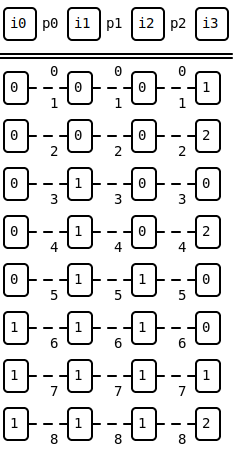

# S-S-C-S

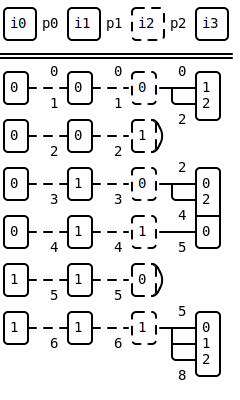

# S-S-DC-S

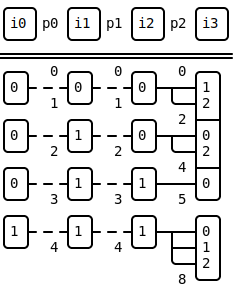

# S-C-S-S

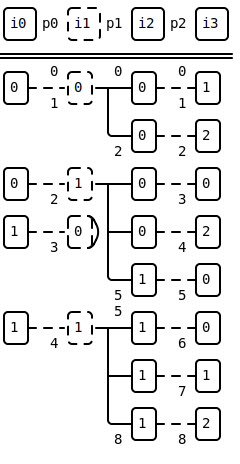

# S-C-C-S

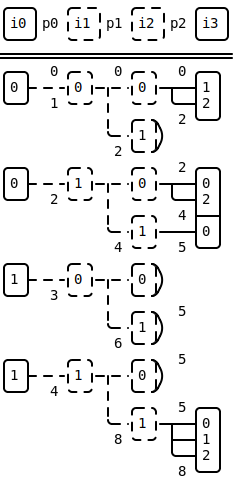

# S-C-DC-S

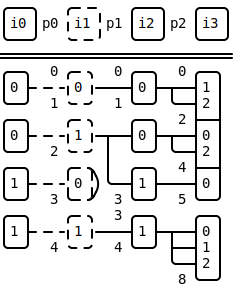

# S-DC-S-S

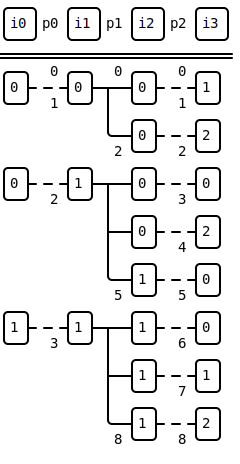

# S-DC-C-S

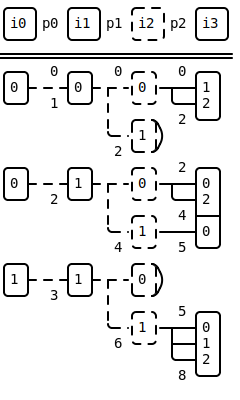

# S-DC-DC-S

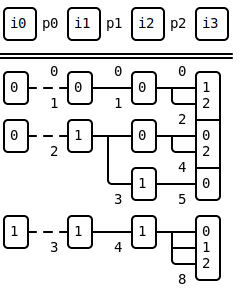

# C-S-S-S

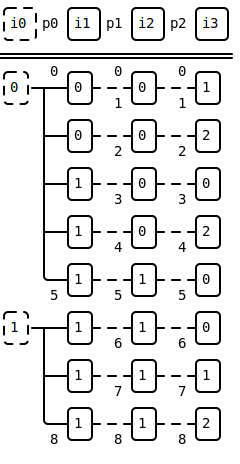

# C-S-C-S

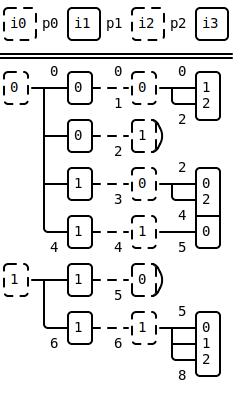

# C-S-DC-S

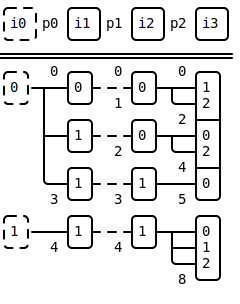

# C-C-S-S

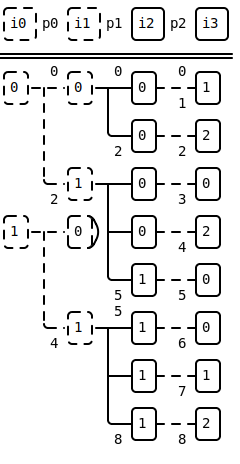

# C-C-C-S

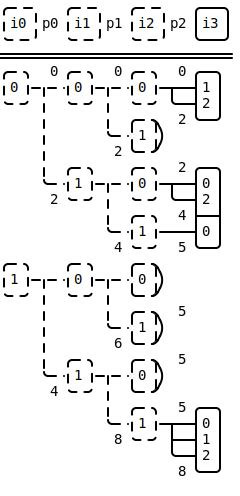

# C-C-DC-S

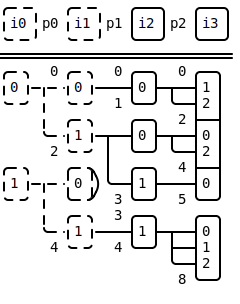

# C-DC-S-S

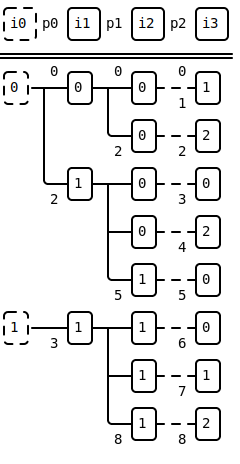

# C-DC-C-S

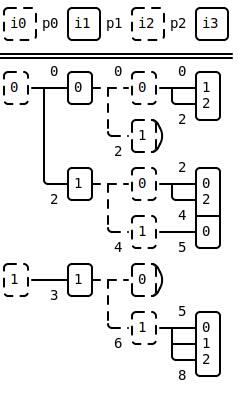

# C-DC-DC-S

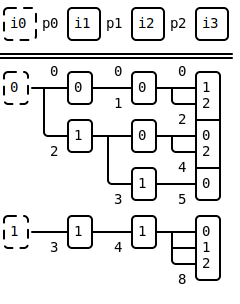

# DC-S-S-S

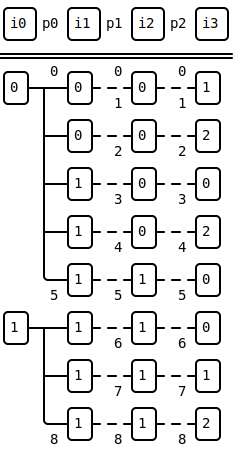

# DC-S-C-S

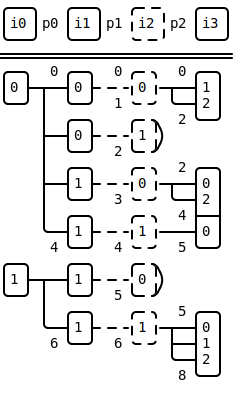

# DC-S-DC-S

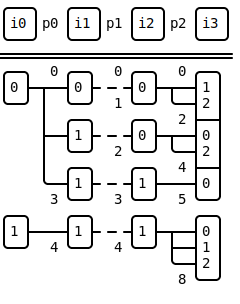

# DC-C-S-S

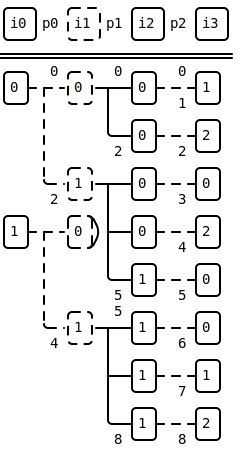

# DC-C-C-S

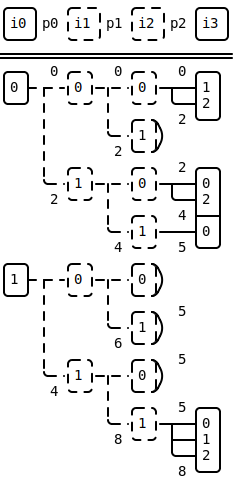

# DC-C-DC-S

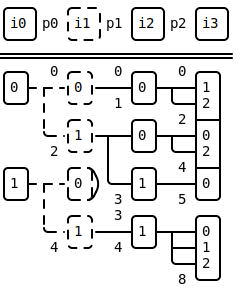

# DC-DC-S-S

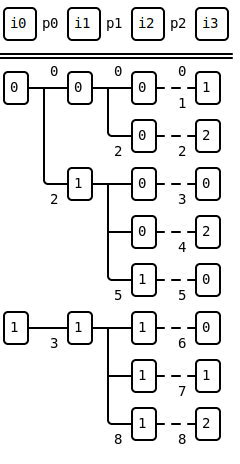

# DC-DC-C-S

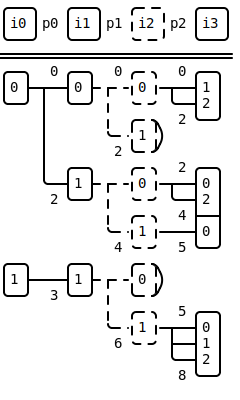

# DC-DC-DC-S

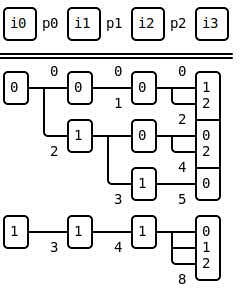

In [3]:
for sparsity in itertools.product(sparsities, sparsities, sparsities, ["S"]):
    structure = "-".join(sparsity)
    IPython.display.display(IPython.display.Markdown(f"# {structure}"))
    IPython.display.display(SPZ(indices, shape=(2, 2, 2, 3), structure=structure))

## Display all sparse structures, `shape=(3, 3, 3, 3)`

# S-S-S-S

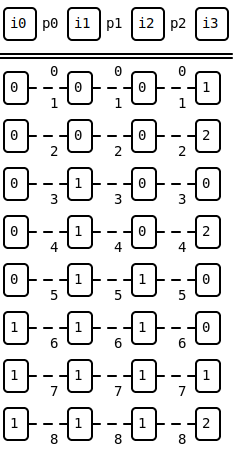

# S-S-C-S

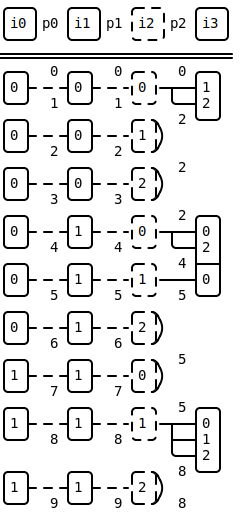

# S-S-DC-S

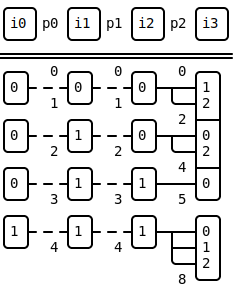

# S-C-S-S

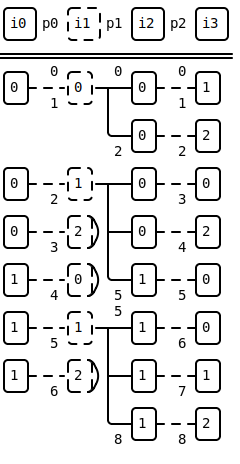

# S-C-C-S

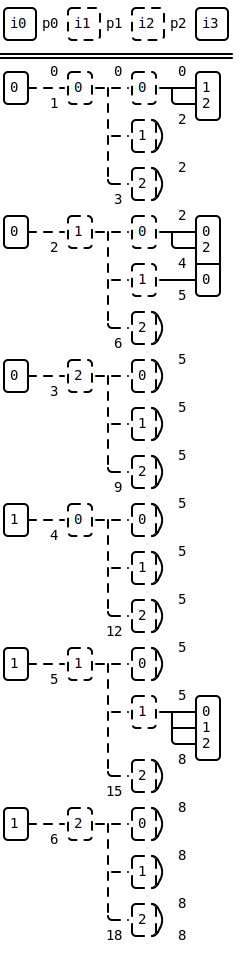

# S-C-DC-S

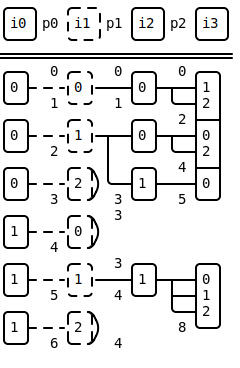

# S-DC-S-S

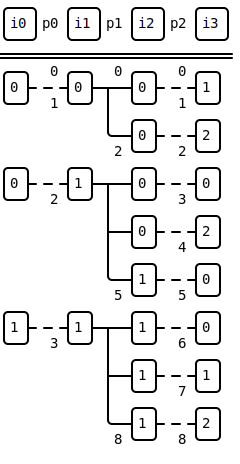

# S-DC-C-S

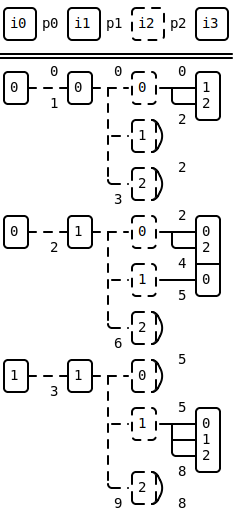

# S-DC-DC-S

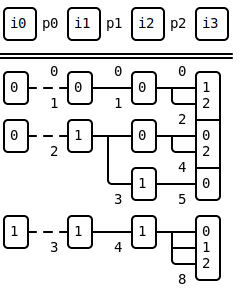

# C-S-S-S

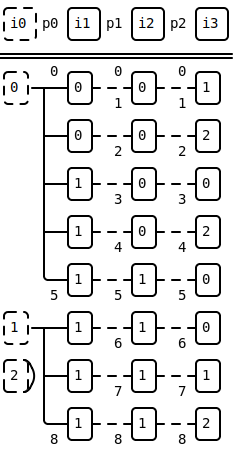

# C-S-C-S

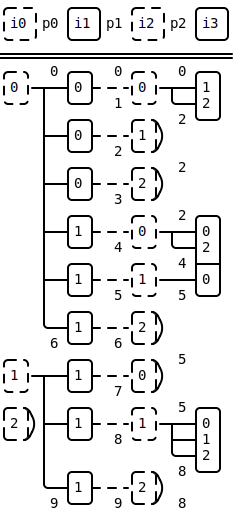

# C-S-DC-S

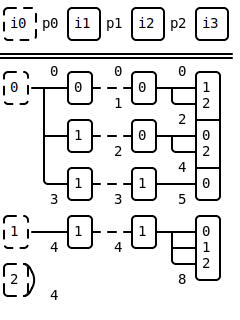

# C-C-S-S

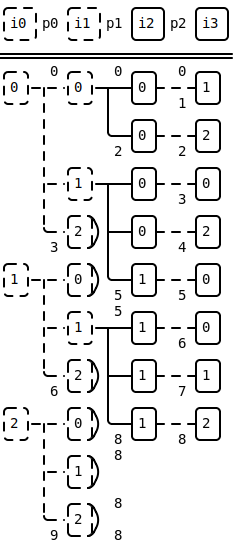

# C-C-C-S

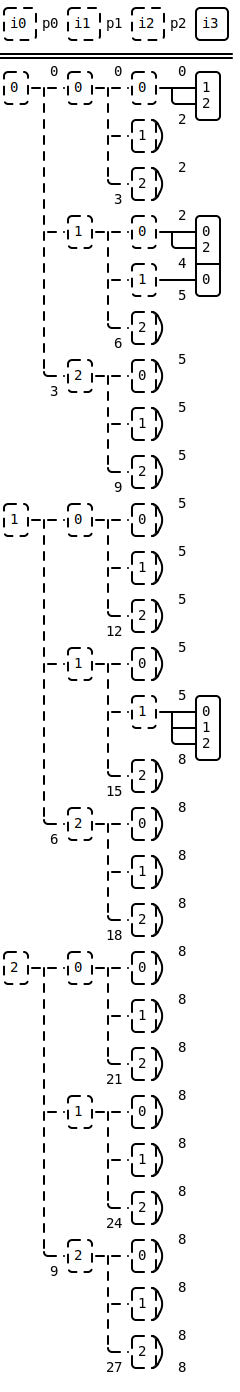

# C-C-DC-S

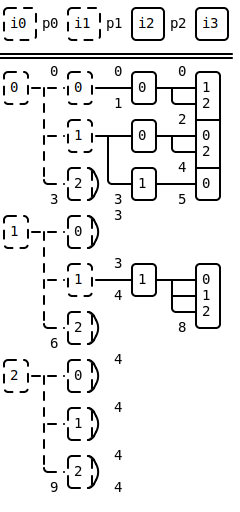

# C-DC-S-S

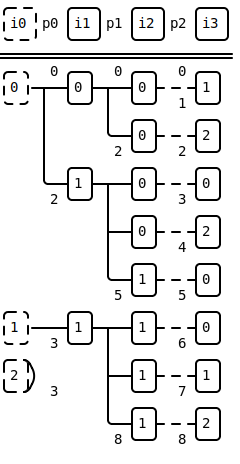

# C-DC-C-S

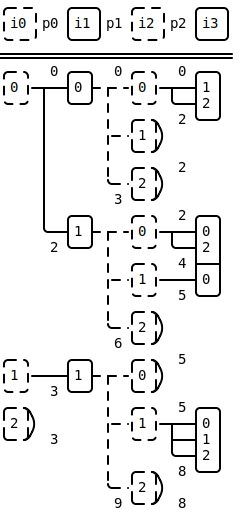

# C-DC-DC-S

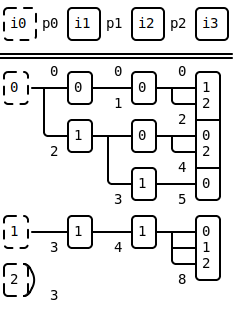

# DC-S-S-S

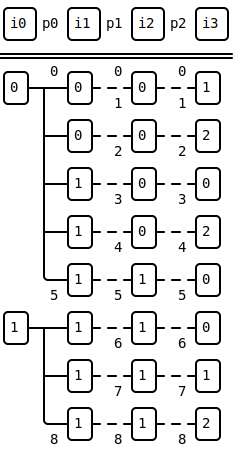

# DC-S-C-S

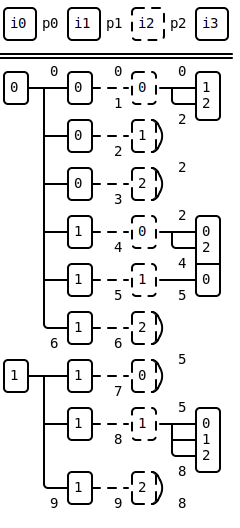

# DC-S-DC-S

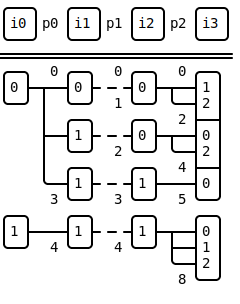

# DC-C-S-S

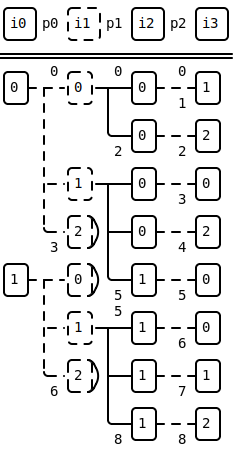

# DC-C-C-S

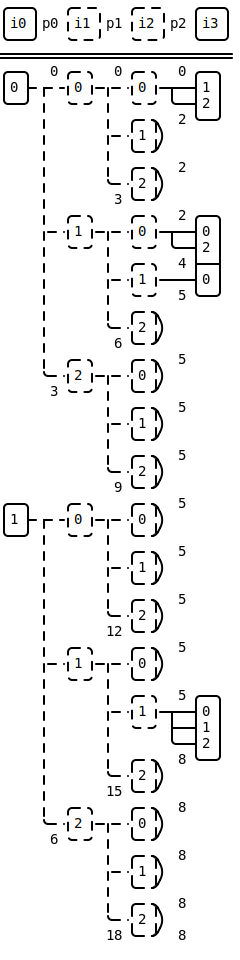

# DC-C-DC-S

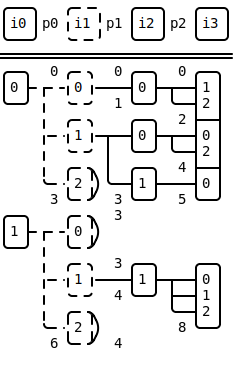

# DC-DC-S-S

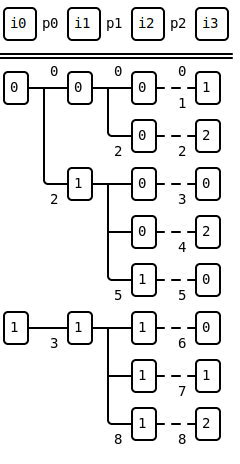

# DC-DC-C-S

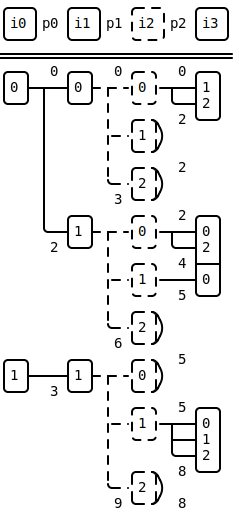

# DC-DC-DC-S

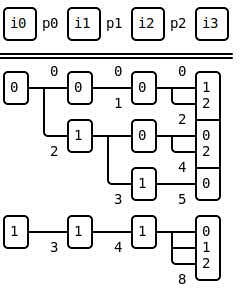

In [4]:
for sparsity in itertools.product(sparsities, sparsities, sparsities, ["S"]):
    structure = "-".join(sparsity)
    IPython.display.display(IPython.display.Markdown(f"# {structure}"))
    IPython.display.display(SPZ(indices, (3, 3, 3, 3), structure))

# voilà!